# Example on how to import files using QDataLib


In [1]:
from qdatalib.tolib import Qdatalib
from qcodes.dataset.plotting import plot_dataset

### Instantiate Qdatalib
To use Qdatalib you need an instance. If you have not setup Qdatalib yet see the example: setting_up_qdatalib

In [2]:
qdatalib = Qdatalib()

### Access your data using Qdatalib
You can get data from Qdatalib using the funcion get_data_by_catalog. 

In [3]:
data = qdatalib.get_data_by_catalog({'run_id':1})

The query returend 2 results
[   {   'C:\\Users\\rbcma\\AppData\\Local\\Temp\\qdatalib_local': {   'db': 'original_path'},
        'Presented': 'group meeting June 24, 2021',
        '_id': 'aaaaaaaa-0000-0000-0000-017aa9641e21',
        'exp_id': 1,
        'exp_name': 'qdatalib',
        'file': 'shared_tutorial.db',
        'my_Score': 2,
        'my_field': 'Group NB',
        'note': ['This happened'],
        'parameters': [['dac_ch1', 'V'], ['dmm_v1', 'V'], ['dmm_v2', 'V']],
        'run_id': 1,
        'run_time': '2021-07-15 10:59:08',
        'sample_name': 'no sample',
        'scientist': 'John doe',
        'tag': ['double dot']},
    {   'C:\\Users\\rbcma\\AppData\\Local\\Temp\\qdatalib_localB': {   'db': 'original_path'},
        'Presented': 'group meeting July 24, 2021',
        '_id': 'aaaaaaaa-0000-0000-0000-017aa96473d6',
        'exp_id': 1,
        'exp_name': 'qdatalibB',
        'file': 'shared_tutorial.db',
        'my_Score': 10,
        'my_field': 'Group C',

If more than one data set matches your query criteria, 
only the mongo collection data are returned. 
You can use the returned information to make a query that gives you the data you want.

In [5]:
data = qdatalib.get_data_by_catalog({'run_id':1,'tag':'double dot'})

([<AxesSubplot:title={'center':'Run #1, Experiment qdatalib (no sample)'}, xlabel='Gate ch1 (V)', ylabel='Gate v1 (V)'>,
  <AxesSubplot:title={'center':'Run #1, Experiment qdatalib (no sample)'}, xlabel='Gate ch1 (V)', ylabel='Gate v2 (mV)'>],
 [None, None])

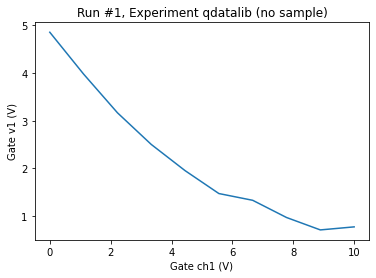

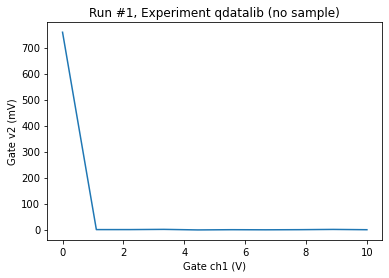

In [6]:
plot_dataset(data)

Getting data from a netcdf is returned as a xarray

In [7]:
data_xarray = qdatalib.get_data_from_nc_by_catalog({'run_id':1,'my_field': 'Group NB'})

In [8]:
data_xarray

<xarray.Dataset>
Dimensions:  (dac_ch1: 10)
Coordinates:
  * dac_ch1  (dac_ch1) float64 0.0 1.111 2.222 3.333 ... 6.667 7.778 8.889 10.0
Data variables:
    dmm_v1   (dac_ch1) float64 ...
    dmm_v2   (dac_ch1) float64 ...
Attributes: (12/13)
    ds_name:                  results
    sample_name:              no sample
    exp_name:                 qdatalib
    snapshot:                 null
    guid:                     aaaaaaaa-0000-0000-0000-017aa9641e21
    run_timestamp:            2021-07-15 10:59:08
    ...                       ...
    captured_run_id:          1
    captured_counter:         1
    run_id:                   1
    run_description:          {"version": 3, "interdependencies": {"paramspec...
    run_timestamp_raw:        1626339548.7205129
    completed_timestamp_raw:  1626339548.8823342

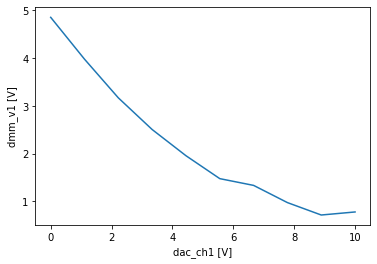

In [9]:
data_xarray.dmm_v1.plot()

Getting data from a csv file is returned as a pandas dataframe

In [13]:
data_df = qdatalib.get_data_from_csv_by_catalog({'run_id':1,'tag':'sigle dot'})

In [15]:
data_df

,dac_ch1,dmm_v1,dmm_v2
0,0.000000,5.040760,0.759494
1,1.111111,4.033489,0.000178
2,2.222222,3.158298,-0.000819
3,3.333333,2.493970,-0.000011
4,4.444444,2.117269,-0.000218
5,5.555556,1.697006,-0.000441
6,6.666667,1.440228,-0.000125
7,7.777778,0.811189,-0.000124
8,8.888889,0.909516,-0.000595
9,10.000000,0.698422,0.000352


<AxesSubplot:xlabel='dac_ch1'>

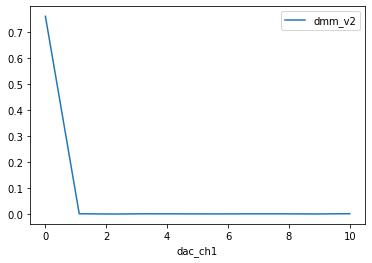

In [21]:
data_df.plot(x='dac_ch1',y='dmm_v2')